In [103]:
%pylab inline
import gwb
from astropy import units as u
from astropy.io import fits
import h5py
style.use('notebook.mplstyle')

Populating the interactive namespace from numpy and matplotlib


/Users/semyeong/anaconda2/envs/py35/lib/python3.5/site-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['f']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [60]:
tgas = gwb.TGASData('../data/stacked_tgas.fits')
# tgas = tgas[tgas.parallax_snr>8]

In [7]:
c = tgas.get_coord()

In [61]:
l, b = tgas._data['l'], tgas._data['b']
l[l>180] -= 360.

In [62]:
parallax_error = tgas._data['parallax_error']
pmra_error = tgas._data['pmra_error']
pmdec_error = tgas._data['pmdec_error']

In [14]:
from scipy import stats

In [57]:
pairidx = fits.getdata('../output/21081/snr8_n128_dv10.fits')
with h5py.File("../output/21081/snr8_n128_dv10_vscatter0-lratio.h5") as f:
    lnH1 = f['lnH1'].value
    lnH2 = f['lnH2'].value
    llr = lnH1 - lnH2

In [63]:
l1,b1 = l[pairidx['star1']], b[pairidx['star1']]

(-90, 90)

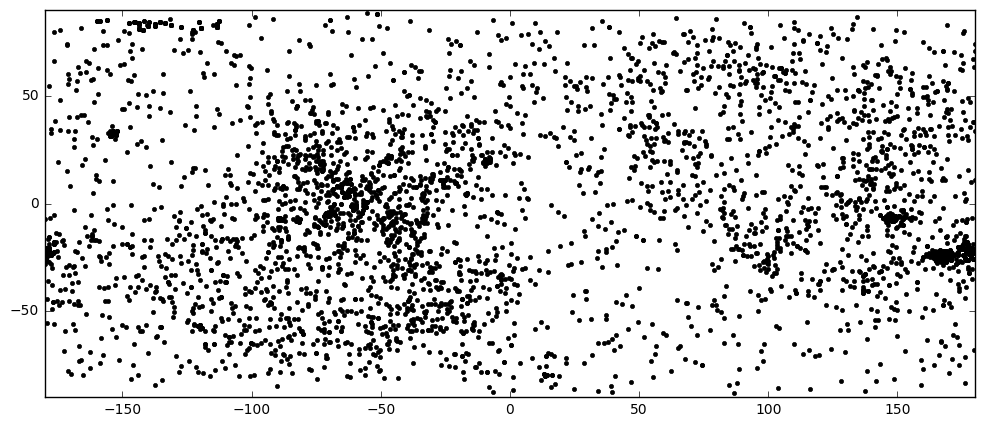

In [68]:
figure(figsize=(12,5))
plot(l1[llr>7], b1[llr>7], 'k.')
xlim(-180,180)
ylim(-90,90)

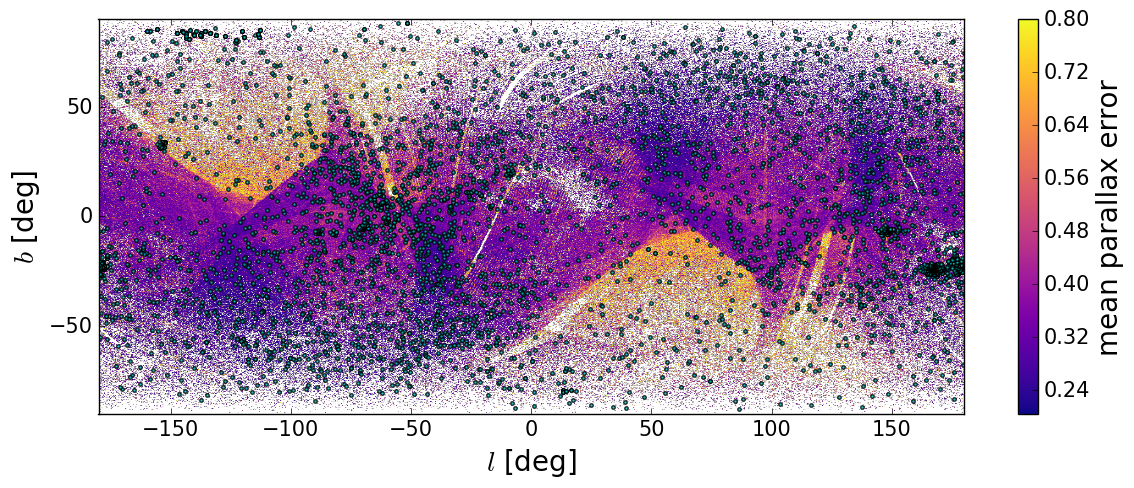

In [123]:
s, ye, xe, bn = stats.binned_statistic_2d(b, l, fabs(parallax_error), bins=1024)

figure(figsize=(12,5))
imshow(s, origin='lower', aspect='auto', cmap='plasma',
       extent=[-180,180,-90,90], vmax=.8)
cax = colorbar()
cax.set_label(r'mean parallax error')
plot(l1[llr>7], b1[llr>7], 'c.', alpha=.8, ms=5., mec='k', mew=1.)
xlim(-180,180)
ylim(-90,90)
xlabel('$l$ [deg]')
ylabel('$b$ [deg]')
tight_layout()
savefig('parallax_error_llr7.png')

/Users/semyeong/anaconda2/envs/py35/lib/python3.5/site-packages/matplotlib/colors.py:1022: RuntimeWarning: invalid value encountered in less_equal
  mask |= resdat <= 0


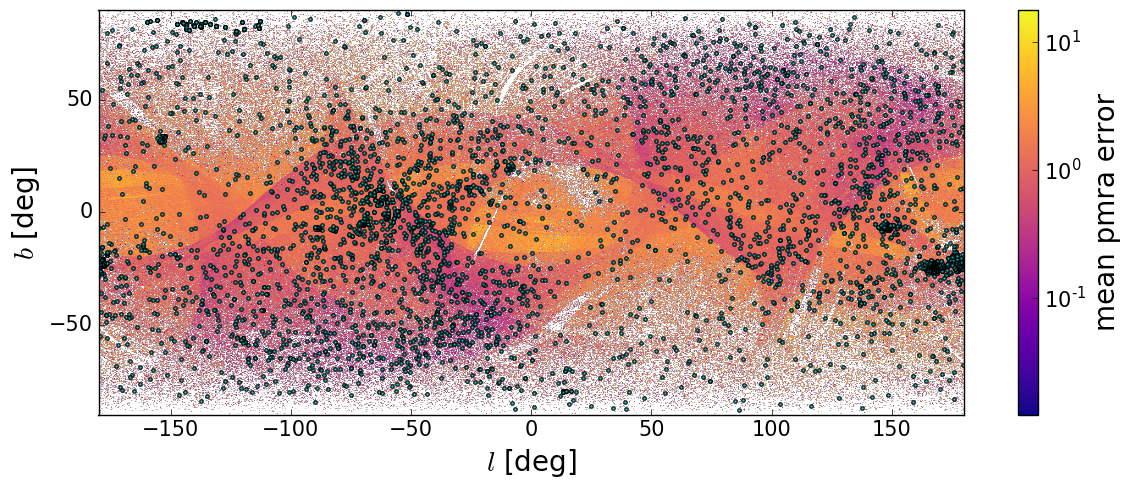

In [124]:
s, ye, xe, bn = stats.binned_statistic_2d(b, l, fabs(pmra_error), bins=1024)

figure(figsize=(12,5))
imshow(s, origin='lower', aspect='auto', cmap='plasma', norm=mpl.colors.LogNorm(),
       extent=[-180,180,-90,90])
cax = colorbar()
cax.set_label('mean pmra error')
plot(l1[llr>7], b1[llr>7], 'c.', alpha=.8, ms=5., mec='k', mew=1.)
xlim(-180,180)
ylim(-90,90)
xlabel('$l$ [deg]')
ylabel('$b$ [deg]')
tight_layout()
savefig('pmra_error_llr7.png')

/Users/semyeong/anaconda2/envs/py35/lib/python3.5/site-packages/matplotlib/colors.py:1022: RuntimeWarning: invalid value encountered in less_equal
  mask |= resdat <= 0


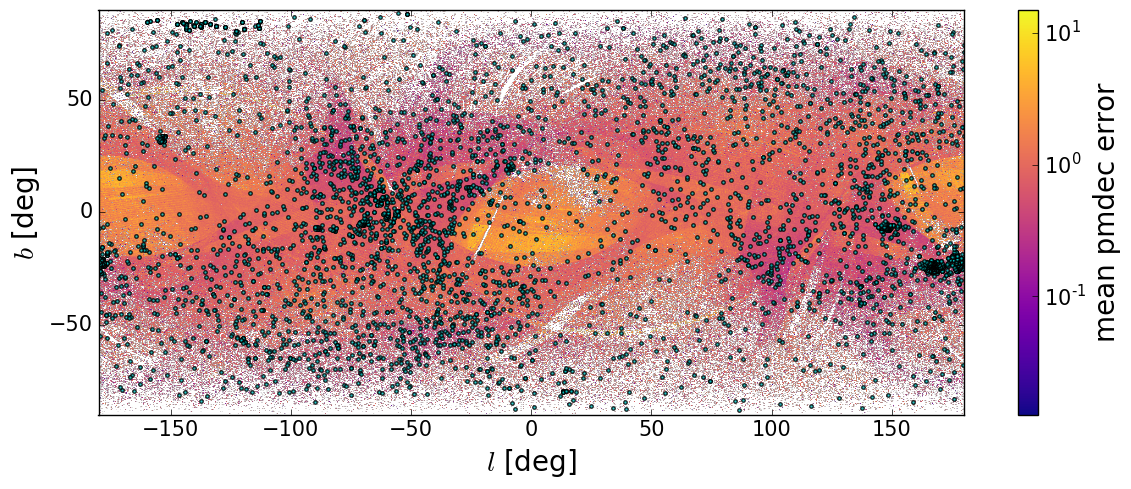

In [122]:
s, ye, xe, bn = stats.binned_statistic_2d(b, l, fabs(pmdec_error), bins=1024)

figure(figsize=(12,5))
imshow(s, origin='lower', aspect='auto', cmap='plasma', norm=mpl.colors.LogNorm(),
       extent=[-180,180,-90,90])
cax = colorbar()
cax.set_label('mean pmdec error')
plot(l1[llr>7], b1[llr>7], 'c.', alpha=.8, ms=5., mec='k', mew=1.)
xlim(-180,180)
ylim(-90,90)
xlabel('$l$ [deg]')
ylabel('$b$ [deg]')
tight_layout()
savefig('pmdec_error_llr7.png')